In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = pd.read_csv('data/927testforTe2.csv')

In [3]:
input_data

,Time,Subsystem #1|CTLs|Vars|Tm,Subsystem #1|Machines|M|TESTSPDOUT,Subsystem #1|Machines|M|TESTTELECT
0,0.00000,0.000000,1.005288,3.309534e-08
1,0.00005,0.000000,1.005288,3.263598e-08
2,0.00010,0.000000,1.005288,3.258290e-08
3,0.00015,0.000000,1.005288,3.293628e-08
4,0.00020,0.000000,1.005288,3.369583e-08
...,...,...,...,...
7995,0.39975,0.914581,0.970005,6.204557e-01
7996,0.39980,0.914565,0.970010,6.204525e-01
7997,0.39985,0.914550,0.970015,6.204492e-01
7998,0.39990,0.914534,0.970020,6.204459e-01


In [4]:
input_data.columns = ['Time', 'Tm', 'w', 'Te']

In [5]:
H = 1.5
D = 0.15

In [6]:
new_tm = (input_data.Te.to_numpy()[1:-1] 
          + 2*H*(((input_data.w.to_numpy()[2:] - input_data.w.to_numpy()[:-2]) / (input_data.Time[1] - input_data.Time[0])) / 2) 
          + D*(input_data.w.to_numpy()[1:-1]-1))

In [7]:
input_data = pd.read_csv('data/927testforTe2.csv')
input_data.columns = ['Time', 'Tm', 'w', 'Te']

In [8]:
input_data['new Tm'] = 0

In [9]:
input_data['new Tm'].iloc[1:-1] = new_tm

C:\Users\chenl\AppData\Local\Temp\ipykernel_16680\2887101334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['new Tm'].iloc[1:-1] = new_tm


In [10]:
input_data['new Tm'][0] = input_data['new Tm'][1]
input_data['new Tm'][7999] = input_data['new Tm'][7998]

<Axes: >

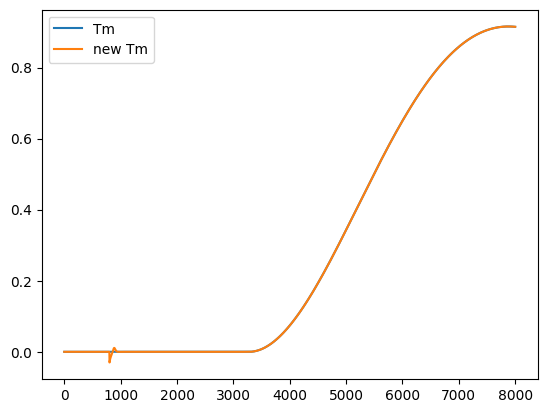

In [11]:
input_data[['Tm', 'new Tm']].plot()

<Axes: >

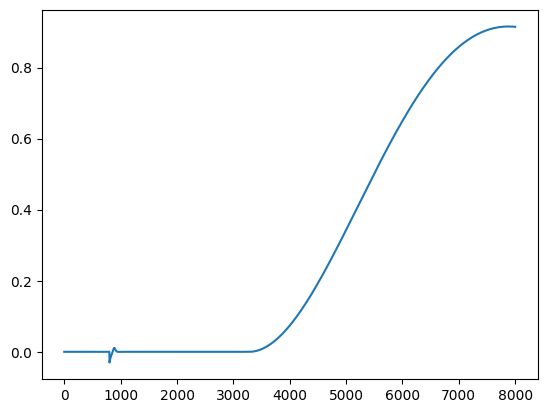

In [12]:
input_data['new Tm'].plot()

<Axes: >

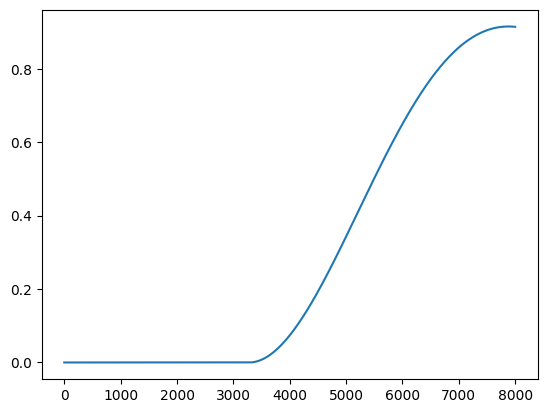

In [13]:
input_data['Tm'].plot()

In [14]:
input_data[['Tm', 'new Tm']].describe()

,Tm,new Tm
count,8000.000000,8000.000000
mean,0.297673,0.297577
std,0.352542,0.352553
min,0.000000,-0.030024
25%,0.000000,0.000006
50%,0.073942,0.073843
75%,0.649861,0.649723
max,0.915488,0.915491


In [15]:
input_data = pd.read_csv('data/927testforTe1.csv')
input_data.columns = ['Time', 'Tm', 'w', 'Te']

In [16]:
input_data

,Time,Tm,w,Te
0,0.00000,0.585752,0.989990,0.614148
1,0.00005,0.585747,0.989990,0.614149
2,0.00010,0.585742,0.989989,0.614149
3,0.00015,0.585737,0.989989,0.614149
4,0.00020,0.585731,0.989988,0.614149
...,...,...,...,...
7995,0.39975,0.611361,0.989614,0.613694
7996,0.39980,0.611356,0.989614,0.613693
7997,0.39985,0.611352,0.989614,0.613693
7998,0.39990,0.611348,0.989614,0.613693


In [17]:
new_te = (input_data.Tm.to_numpy()[1:-1] 
          - 2*H*(((input_data.w.to_numpy()[2:] - input_data.w.to_numpy()[:-2]) / (input_data.Time[1] - input_data.Time[0])) / 2) 
          - D*(input_data.w.to_numpy()[1:-1]-1))

In [18]:
input_data = pd.read_csv('data/927testforTe1.csv')
input_data.columns = ['Time', 'Tm', 'w', 'Te']

In [19]:
input_data['new Te'] = 0

In [20]:
input_data['new Te'].iloc[1:-1] = new_te

C:\Users\chenl\AppData\Local\Temp\ipykernel_16680\2791689240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['new Te'].iloc[1:-1] = new_te


In [21]:
input_data['new Te'][0] = input_data['new Te'][1]
input_data['new Te'][7999] = input_data['new Te'][7998]

<Axes: >

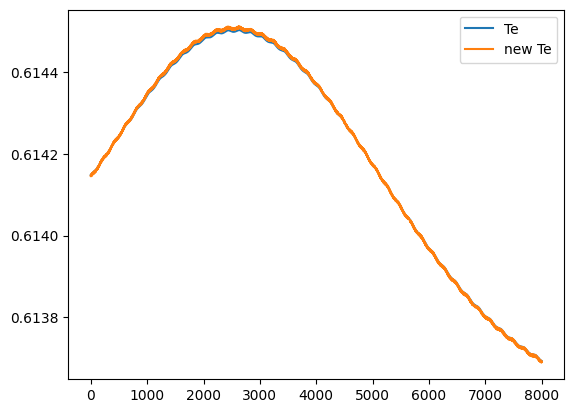

In [22]:
input_data[['Te', 'new Te']].plot()

<Axes: >

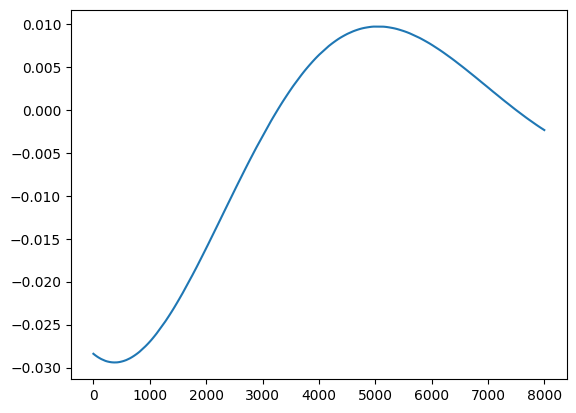

In [23]:
pd.Series(2*H*(((input_data.w.to_numpy()[2:] - input_data.w.to_numpy()[:-2]) / (input_data.Time[1] - input_data.Time[0])) / 2) 
          + D*(input_data.w.to_numpy()[1:-1]-1)).plot()

In [24]:
pd.Series(2*H*(((input_data.w.to_numpy()[2:] - input_data.w.to_numpy()[:-2]) / (input_data.Time[1] - input_data.Time[0])) / 2) 
          + D*(input_data.w.to_numpy()[1:-1]-1)).describe()

count    7998.000000
mean       -0.004416
std         0.013568
min        -0.029413
25%        -0.016120
50%         0.000793
75%         0.007105
max         0.009721
dtype: float64